1.   **Choose a model**
2.   **Split the data into train and test sets**

1.   **Fit the model on training set**
2.   **Evaluate model on test set**

1.   **Re-fit model on entire data set**
2.   **Forecast for future data**


In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('/content/drive/My Drive/Time Series practise/Data/airline_passengers.csv', index_col='Month',parse_dates=True)

In [0]:
df.index.freq = 'MS'

In [6]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [0]:
train_data = df.iloc[:109]
# test data should be ideally at least as large as the maximum forecast horizon required 
test_data = df.iloc[108:]

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [0]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [0]:
test_prediction = fitted_model.forecast(36)

In [12]:
test_prediction

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
1958-07-01    521.801193
1958-08-01    514.525372
1958-09-01    446.222776
1958-10-01    385.432121
1958-11-01    339.645926
1958-12-01    381.452236
1959-01-01    401.211186
1959-02-01    387.157129
1959-03-01    455.808535
1959-04-01    450.043490
1959-05-01    459.534631
1959-06-01    540.121064
1959-07-01    595.679687
1959-08-01    587.373728
1959-09-01    509.400604
1959-10-01    440.002990
1959-11-01    387.734221
1959-12-01    435.459618
1960-01-01    458.016112
1960-02-01    441.972230
1960-03-01    520.343550
1960-04-01    513.762270
1960-05-01    524.597200
1960-06-01    616.593351
1960-07-01    680.018164
1960-08-01    670.536218
1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

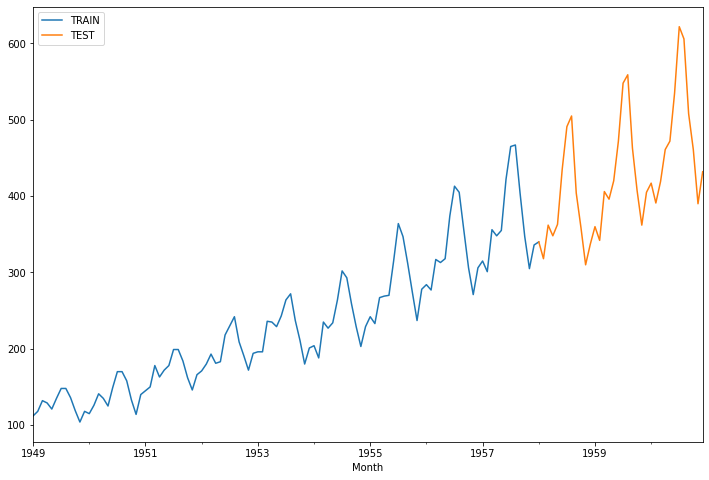

In [17]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8));
test_data['Thousands of Passengers'].plot(legend=True,label='TEST');

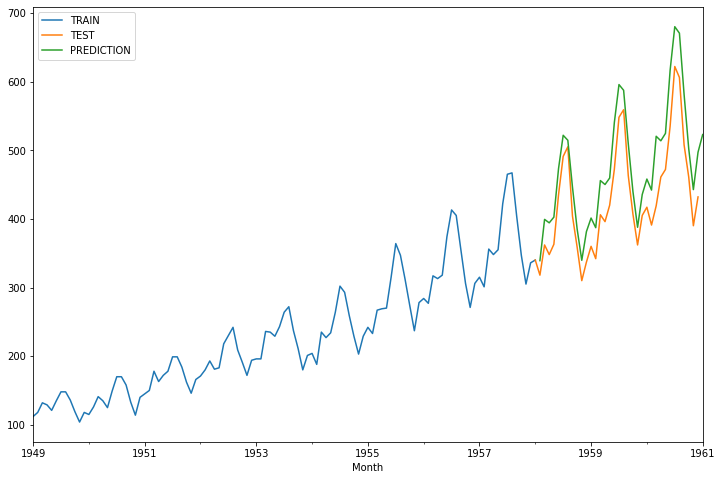

In [18]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8));
test_data['Thousands of Passengers'].plot(legend=True,label='TEST');
test_prediction.plot(legend=True,label='PREDICTION');